# Final Project - Linear Regression with Medical Insurance
**Name:** SungHak Hong

**Github:** 
## 1. Introduction and Problem Description

With this project, I want to explore what factor causes the high cost in medical insurance. I obtained the dataset from Kaggle (Reference: <https://www.kaggle.com/datasets/mirichoi0218/insurance>). In this dataset, the following columns in the dataset are: 

* **age**: age of primary beneficiary (int)
* **sex**: insurance contractor gender, female, male (object)
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight $(kg / m^2)$ using the ratio of height to weight, ideally 18.5 to 24.9 (float)
* **children**: Number of children covered by health insurance / Number of dependents (int)
* **smoker**: Insurance contractor smokes or not (boolean)
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. (object)
* **charges**: Individual medical costs billed by health insurance (float)

During this project, I want to figure out what aspects of customers pay more money to medical insurance. With this problem solving, we can get some idea what factors make the cost of treatment increases, and thus how this can be improve to make more profit in medical insurance industry.

## 2. EDA Procedure
### Import Library

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Import and Clean Dataset

In [64]:
df = pd.read_csv(r'C:\Users\vmfl7\Desktop\Dataset\insurance.csv')
#remove nulls in dataset
df = df.dropna()

In [65]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Outliers Check

In [48]:
print('Minumum: ')
print(df.min())

Minumum: 
age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object


In [47]:
print('Maximum: ')
print(df.max())

Maximum: 
age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object


If our dataset contains outliers, it can cause anomalies in the results obtained from regression model. Thus, we need to check if there is outliers in dataset. I displayed the minimum and maximum values of all the columns. If we see the minimum and maximum values in each columns, all the factors seems very resonable - we can conclude that there is no outliers in this dataset. 

In [104]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

## 3. Visualization and Analysis

In this project, I want to know how the other factors causes the increase of charges in health insurance. There are two types of variables in the dataset - numeric variables such as age, bmi, children, or charges, and objact variables such as sex, smoker, and region. 

The heatmap below represents how correlation between two columns are related each other. According to the data, only smoker and charge column affects each other properly.

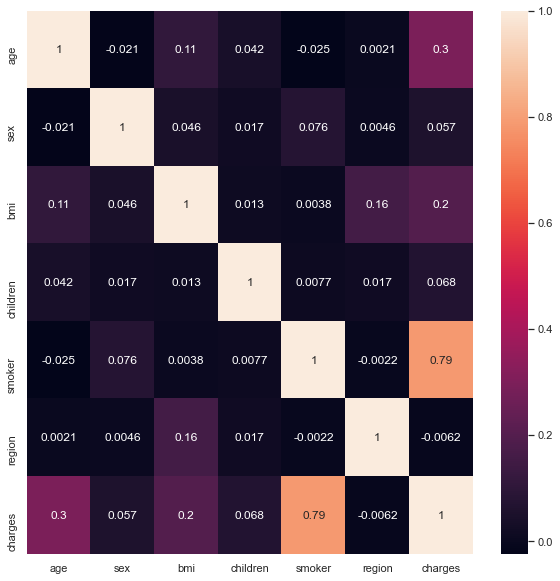

In [105]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True)

### Smokers vs Charges

So I created the plot to see how people between smokers and non-smokers charges the cost differently.

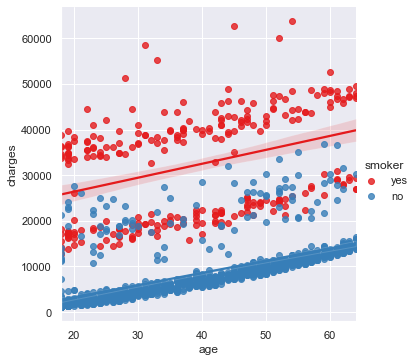

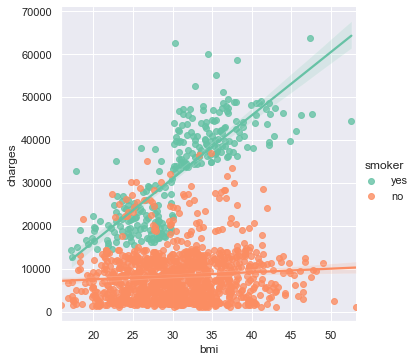

In [67]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')

As the result, the data of smokers are clustered higher than the data of non-smokers. Thus, we could assume that smokers charges higher costs than non-smokers from the healthcare insurance.

Next, I divided my dataframe into 2 parts: smokers and non-smokers.

In [96]:
df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']

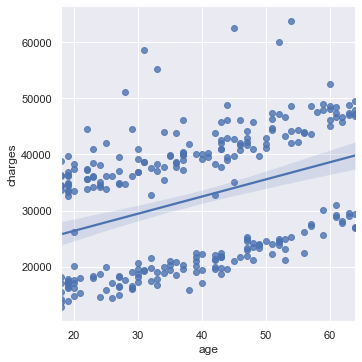

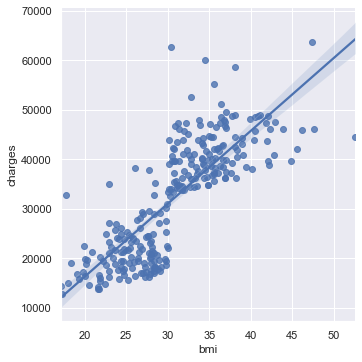

In [128]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_smoker)
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df_smoker)

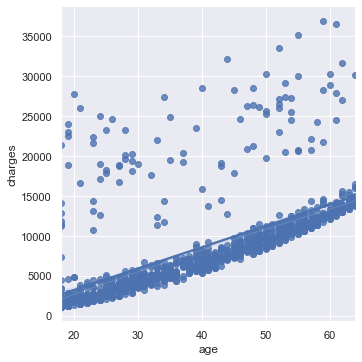

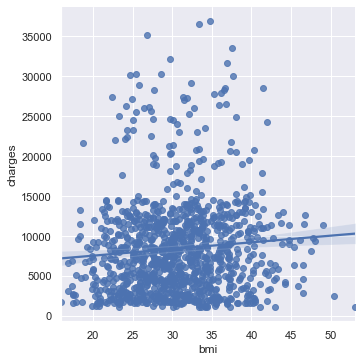

In [129]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_nonsmoker)
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df_nonsmoker)

### Single and Multi Linear Regression

In [115]:
model_age = smf.ols(formula='charges ~ age', data=df_smoker).fit()
model_bmi = smf.ols(formula='charges ~ bmi', data=df_smoker).fit()
model_smokers = smf.ols(formula='charges ~ age + bmi', data=df_smoker).fit()
model_nonsmokers = smf.ols(formula='charges ~ age + bmi', data=df_nonsmoker).fit()

lr1 = model_age.summary()
lr2 = model_bmi.summary()
lr3 = model_smokers.summary()
lr4 = model_nonsmokers.summary()

print(lr1)
print(lr2)
print(lr3)
print(lr4)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     42.67
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           3.18e-10
Time:                        03:33:03   Log-Likelihood:                -2931.2
No. Observations:                 274   AIC:                             5866.
Df Residuals:                     272   BIC:                             5874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04   1913.400     10.606      0.0

In [121]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_smoker, test_size=0.25)

train_df

,age,sex,bmi,children,smoker,region,charges
1171,43,female,26.700,2,yes,southwest,22478.60000
421,61,male,35.860,0,yes,southeast,46599.10840
314,27,female,31.400,0,yes,southwest,34838.87300
161,18,female,36.850,0,yes,southeast,36149.48350
1170,18,male,27.360,1,yes,northeast,17178.68240
...,...,...,...,...,...,...,...
296,19,male,27.700,0,yes,southwest,16297.84600
857,25,male,24.130,0,yes,northwest,15817.98570
989,24,female,20.520,0,yes,northeast,14571.89080
1267,24,male,31.065,0,yes,northeast,34254.05335


In [1]:
allowed_factors = ['age', 'sex', 'bmi', 'children','region']
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='charges~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

train_charges1 =smf.ols(formula='charges ~ bmi', data=train_df).fit()
train_charges1.rsquared_adj

NameError: name 'smf' is not defined

In [127]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='charges~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

train_charges2 = smf.ols(formula=train_charges1.model.formula+'+'+best[0], data=train_df).fit()
train_charges2.rsquared_adj

age 0.17667820534804313
sex 0.03153315257908562
bmi 0.6443106579699758
children 5.204666654134993e-05
region 0.0854709381480051
best: ['bmi', 0.6443106579699758]


0.6464451112910952

## 4. Conclusion

During the final project, I applied single and multiple linear regression model to find the R squared value to see how the correlations between the charges and other factors. According to the summary, the most effective columns to change the cost of treatment is age and bmi. In a specifically, the cost of treatment increases with age for non-smokers, and with bmi for smokers. It was very interesting to me that the prime factor is different based on the conditions whether the patient smokes or not. As single linear regression model, the smoking is the greatest factor that affects medical cost charges, then followed by bmi and age. 